**[Auga Baltic](https://www.augabaltic.ee/en) car insurance**, located at the Koidula border crossing, have requested my service in building a model to predict whether a customer will make a claim on their insurance during the policy period. As they have very little expertise and infrastructure for deploying and monitoring machine learning models, they've asked me to identify the single feature that results in the best performing model, as measured by accuracy, so they can start with a simple model in production.

They have supplied me with their customer data. I Anonymized and preprocessed the data (created some categories) and uploaded it here as a csv file called `car_insurance.csv`, along with a table detailing the column names and descriptions below.



## The dataset

| Column | Description |
|--------|-------------|
| `id` | Unique client identifier |
| `age` | Client's age: <br> <ul><li>`0`: 16-15</li><li>`1`: 26-39</li><li>`2`: 40-64</li><li>`3`: 65+</li></ul> |
| `gender` | Client's gender: <br> <ul><li>`0`: Female</li><li>`1`: Male</li></ul> |
| `driving_experience` | Years the client has been driving: <br> <ul><li>`0`: 0-9</li><li>`1`: 10-19</li><li>`2`: 20-29</li><li>`3`: 30+</li></ul> |
| `education` | Client's level of education: <br> <ul><li>`0`: No education</li><li>`1`: High school</li><li>`2`: University</li></ul> |
| `income` | Client's income level: <br> <ul><li>`0`: Poverty</li><li>`1`: Working class</li><li>`2`: Middle class</li><li>`3`: Upper class</li></ul> |
| `credit_score` | Client's credit score (between zero and one) |
| `vehicle_ownership` | Client's vehicle ownership status: <br><ul><li>`0`: Does not own their vehilce (paying off finance)</li><li>`1`: Owns their vehicle</li></ul> |
| `vehcile_year` | Year of vehicle registration: <br><ul><li>`0`: Before 2015</li><li>`1`: 2015 or later</li></ul> |
| `married` | Client's marital status: <br><ul><li>`0`: Not married</li><li>`1`: Married</li></ul> |
| `children` | Client's number of children |
| `postal_code` | Client's postal code | 
| `annual_mileage` | Number of miles driven by the client each year |
| `vehicle_type` | Type of car: <br> <ul><li>`0`: Sedan</li><li>`1`: Sports car</li></ul> |
| `speeding_violations` | Total number of speeding violations received by the client | 
| `duis` | Number of times the client has been caught driving under the influence of alcohol |
| `past_accidents` | Total number of previous accidents the client has been involved in |
| `outcome` | Whether the client made a claim on their car insurance (response variable): <br><ul><li>`0`: No claim</li><li>`1`: Made a claim</li></ul> |

In [189]:
# Import required modules
import pandas as pd
import numpy as np
from statsmodels.formula.api import logit
import matplotlib.pyplot as plt
import seaborn as sns

In [175]:
car_insurance = pd.read_csv('car_insurance.csv')
car_insurance.head()

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,3,0,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,0,1,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,0,0,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,0,1,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,1,1,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [176]:
car_insurance.isna().sum()

id                       0
age                      0
gender                   0
driving_experience       0
education                0
income                   0
credit_score           982
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
duis                     0
past_accidents           0
outcome                  0
dtype: int64

<AxesSubplot: xlabel='credit_score', ylabel='Count'>

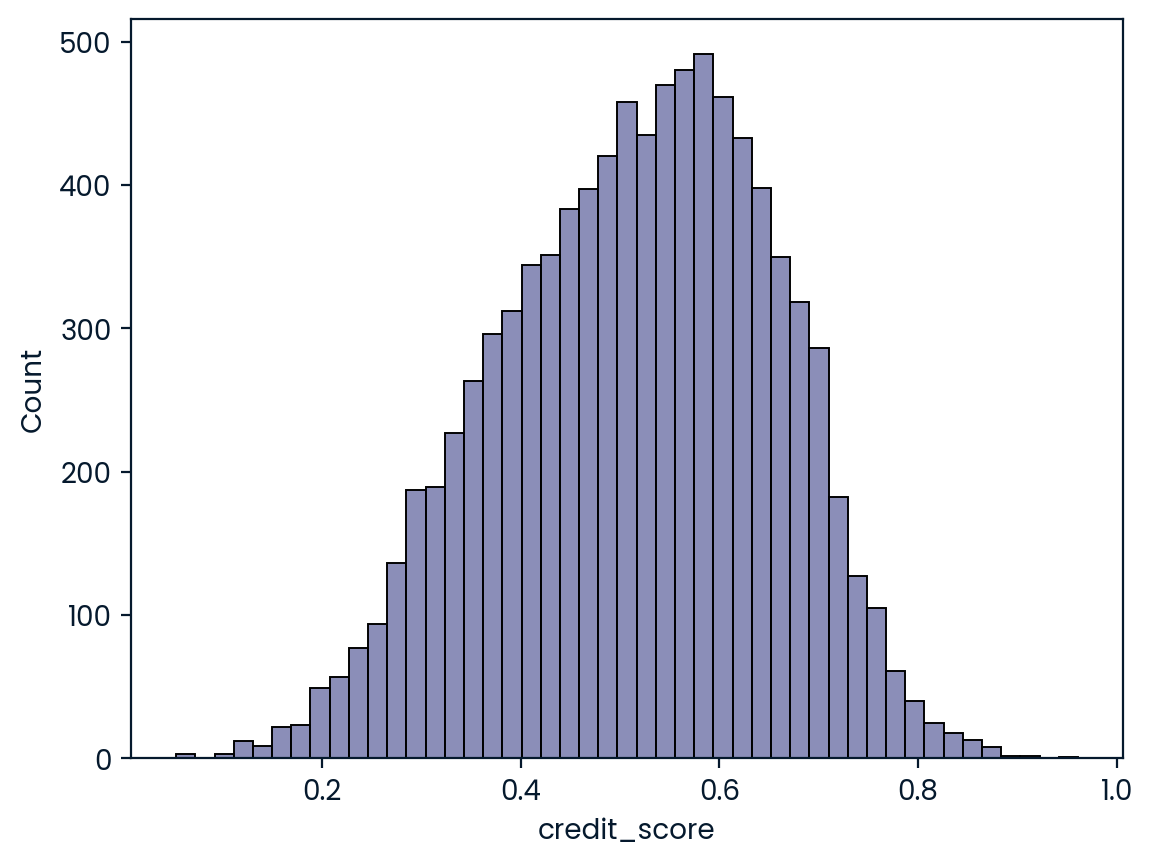

In [177]:
sns.histplot(x='credit_score', data=car_insurance)

<AxesSubplot: xlabel='annual_mileage', ylabel='Count'>

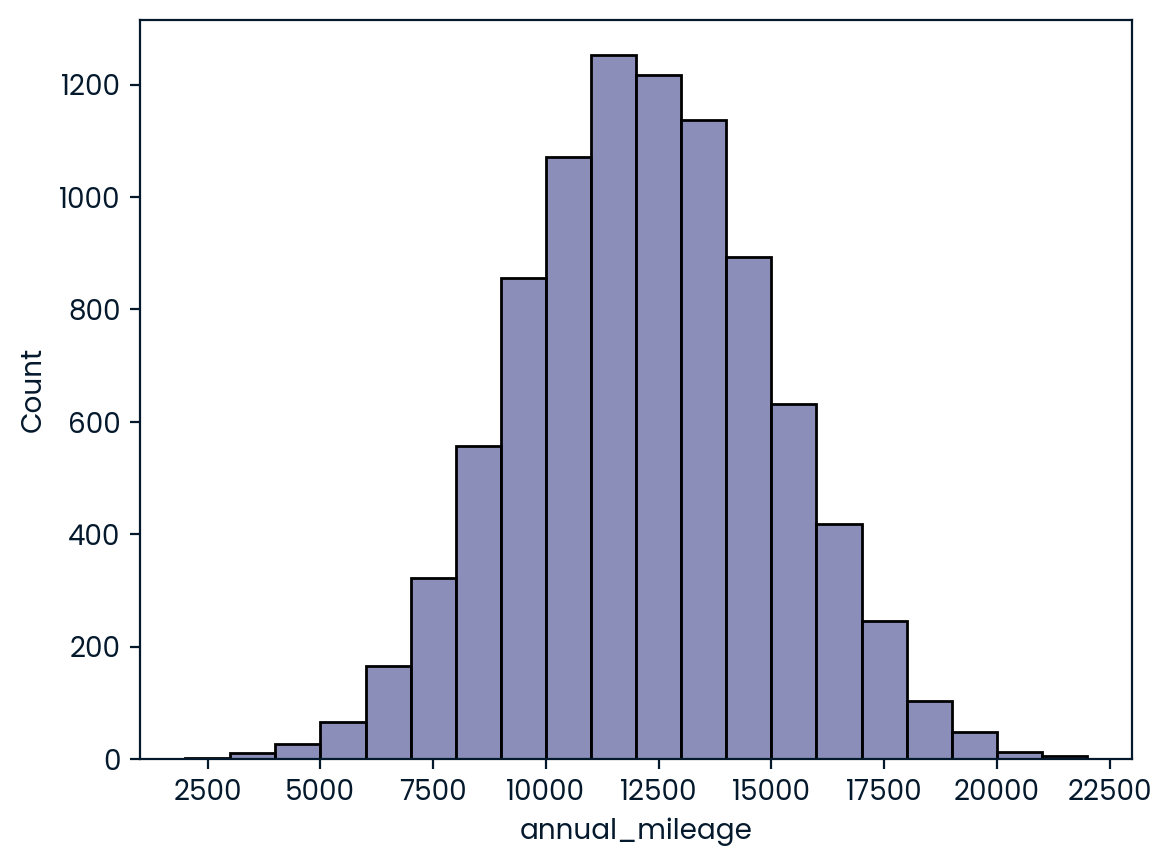

In [178]:
sns.histplot(x='annual_mileage', data=car_insurance, binwidth = 1000)

## Two of the columns have missing values, and their values appear to be normally distributed.

So, I will replace missing values in these columns with the mean.

In [179]:
car_insurance['credit_score'].fillna(car_insurance['credit_score'].mean(), inplace = True)
car_insurance['annual_mileage'].fillna(car_insurance['annual_mileage'].mean(), inplace = True)
car_insurance.isna().sum()

id                     0
age                    0
gender                 0
driving_experience     0
education              0
income                 0
credit_score           0
vehicle_ownership      0
vehicle_year           0
married                0
children               0
postal_code            0
annual_mileage         0
vehicle_type           0
speeding_violations    0
duis                   0
past_accidents         0
outcome                0
dtype: int64

In [180]:
car_insurance.value_counts('outcome', normalize = True)

outcome
0.0    0.6867
1.0    0.3133
dtype: float64

~ **68.7% of customers did not raise a claime,** ~ **31.3% of customers raised a claime.**

In [181]:
models = []
features = car_insurance.drop(columns=["id", "outcome"]).columns

for col in features:
    model = logit(f"outcome ~ {col}", data=car_insurance).fit()
    models.append(model)   

Optimization terminated successfully.
         Current function value: 0.511794
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.615951
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.467092
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.603742
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.531499
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.572557
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.552412
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572668
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.586659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595431
  

In [182]:
accuracies = []

for feature in range(0, len(models)):
    conf_matrix = models[feature].pred_table()
    TN = conf_matrix[0,0] # True negative
    TP = conf_matrix[1,1] # True positive
    FN = conf_matrix[1,0] # False negative
    FP = conf_matrix[0,1] # False positive
    acc = (TN + TP) / (TN + FN + FP + TP) # accuracy
    accuracies.append(acc)

In [183]:
best_feature = features[accuracies.index(max(accuracies))]
print(best_feature, ': ', max(accuracies))

driving_experience :  0.7771


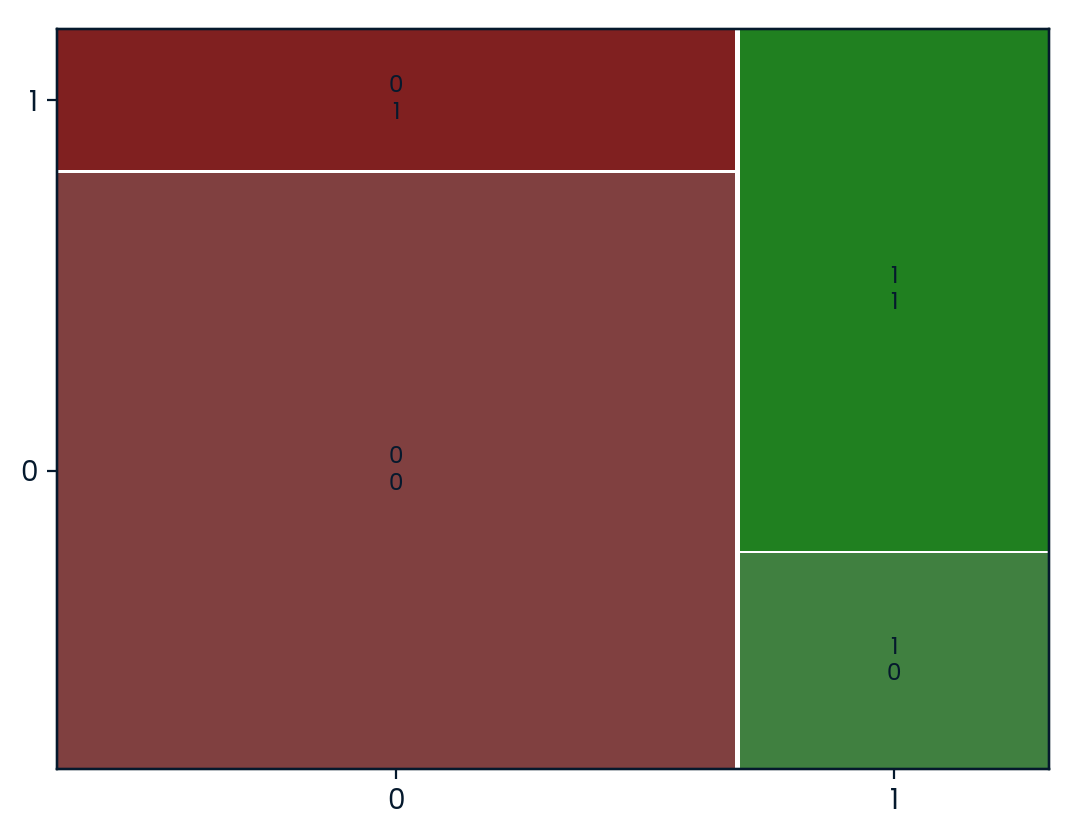

In [184]:
from statsmodels.graphics.mosaicplot import mosaic
conf_matrix = models[accuracies.index(max(accuracies))].pred_table()
mosaic(conf_matrix)
plt.show()

In [185]:
car_insurance['driving_experience'].unique()

array(['0-9y', '10-19y', '20-29y', '30y+'], dtype=object)

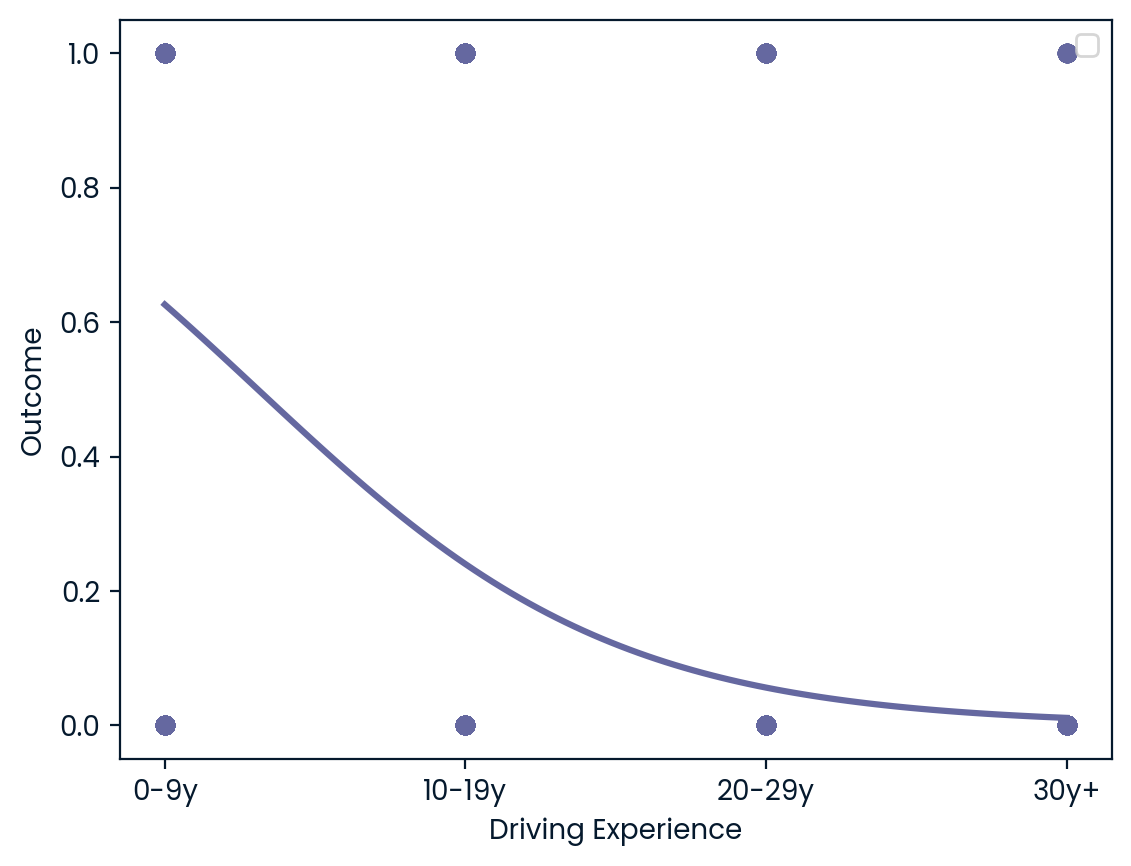

In [186]:
experience_mapping = {
    '0-9y': 0,
    '10-19y': 10,
    '20-29y': 20,
    '30y+': 30
}
car_insurance['driving_experience_numeric'] = car_insurance['driving_experience'].map(experience_mapping)

sns.regplot(x='driving_experience_numeric', y='outcome', data=car_insurance, logistic=True, ci=None, n_boot=10)
plt.xticks(list(experience_mapping.values()), list(experience_mapping.keys()))
plt.xlabel('Driving Experience')
plt.ylabel('Outcome')
plt.legend()
plt.show()

- **Probability of a claim is decreasing as the driving experience (category) is increasing.** This means that higher driving experience category clients tend to put less claims.

In [187]:
best_feature_df = pd.DataFrame({"best_feature": best_feature, 
                                "best_accuracy": max(accuracies)},
                                index=[0])
best_feature_df

,best_feature,best_accuracy
0,driving_experience,0.7771


## The model using driving experience to predict the outcome has the best performance, as measured by accuracy. Therefore, it was suggested for **[Auga Baltic](https://www.augabaltic.ee/en) car insurance** was suggested to implement this model in production.